# Practice Session 09: Viral Propagation Analysis

<font size="+1" color="white">


Mario Muñoz Serrano



Mail: mario.munoz01@estudiant.upf.edu


ID: U172951



</font>

<font size="+2" color="blue">Additional results: targeted immunization</font>

# 1. The SFHH Conference Dataset

In [ ]:
import io
import csv
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random

In [ ]:
INPUT_FILENAME = "sfhh-conference-2009.csv"

In [ ]:
# Create a new undirected graph
g = nx.Graph()

with io.open(INPUT_FILENAME) as input_file:
    # Creating a CSV reader for a comma-delimited file with a header
    reader = csv.DictReader(input_file, delimiter=',')
    
    # Iterating through records, each record is a dictionary
    for record in reader:
        
        # Adding one edge per record
        g.add_edge(record['Source'], record['Target'])

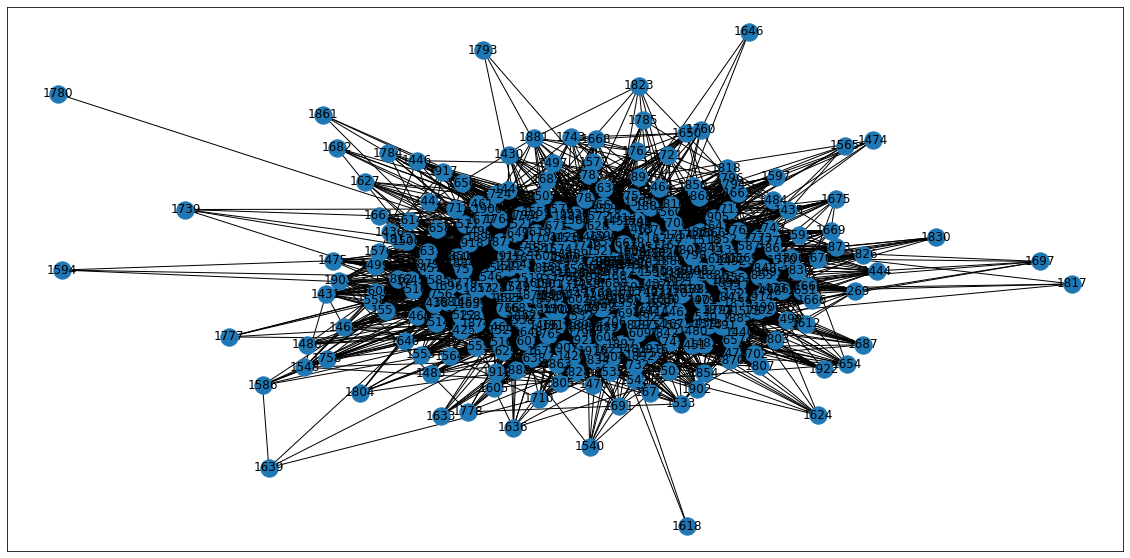

In [ ]:
# Creating an empty figure; feel free to change size to accommodate to your screen
plt.figure(figsize=(20,10))

# Draw the graph
nx.draw_networkx(g)

In [ ]:
print("The number of nodes is: " + str(g.number_of_nodes()))
print("The number of edges is: " + str(g.number_of_edges()))
print("The number of connected components is: " + str(nx.number_connected_components(g)))
print("\n\n\n\n")

The number of nodes is: 403
The number of edges is: 9565
The number of connected components is: 1







In [ ]:
# K-core decomposition

def get_max_degree(g):
    degree_sequence = [x[1] for x in g.degree()]
    return(max(degree_sequence))


def nodes_with_degree_less_or_equal_than(g, degree):
    nodes = []
    for node in g.nodes():
        if g.degree(node) <= degree:
            nodes.append(node)
    return nodes


def kcore_decomposition(graph):

    g = graph.copy()
    max_degree = get_max_degree(g)
 
    node_to_level = {}
    for level in range(1, max_degree + 1):

      # Obtain the list of nodes with degree <= level
      nodes_in_level = nodes_with_degree_less_or_equal_than(g, level)
        
      # Check if this list is empty
      if len(nodes_in_level) == 0:
          break
        
      # If the list is not empty, assign the nodes to the
      # corresponding level and remove the node
      for node in nodes_in_level:
          g.remove_node(node)
        
      node_to_level[level] = nodes_in_level
                
 
    return node_to_level

nodes_by_lavel = kcore_decomposition(g)

levels = sorted(nodes_by_lavel.keys())

def print_K_Core_level(level):
  count = 0
  for person in nodes_by_lavel[level]:
    print(person, end="\t")
    count += 1
    if count % 10 == 0:
      print(person)

print("\nThe people in the deepest K-core"+" in the " + str(len(levels))+"-core" +" in the graph are: \n")

print_K_Core_level(len(levels))

print("\n\nThe people in the second deepest K-core"+" in the " + str(len(levels)-1)+"-core" +" in the graph are: \n")
print_K_Core_level(len(levels)-1)










The people in the deepest K-core in the 39-core in the graph are: 

1441	1554	1598	1617	1678	1857	1563	1635	1655	1684	1684
1847	1920	1579	1613	1688	1761	1825	1707	1731	1458	1458
1517	1599	1752	1840	1562	1592	1740	1527	1831	1908	1908
1568	1590	1603	1698	1701	1835	1664	

The people in the second deepest K-core in the 38-core in the graph are: 

1437	1463	1495	1604	1871	1886	1471	1489	1501	1525	1525
1582	1626	1703	1898	1591	1593	1754	1479	1531	1556	1556
1580	1643	1692	1711	1717	1772	1789	1821	1887	1519	1519
1520	1537	1600	1628	1700	1718	1829	1889	1574	1911	1911
1448	1858	1462	1539	1602	1667	1676	1798	1641	1734	1734
1767	

<font size="+1" color="white">

The basic information of this graph are the following. The number of nodes is 403, the number of edges is 9565 and only one connected component. Finally we have consider interesting to know wich nodes have more interactions, in order to know which nodes have the capacity to spread the virus to a more people. Using the k-Core decomposition and printing the nodes which are in the two deepest k-Core.

</font>

# 2. Independent cascade model

In [ ]:
def infect_recursive(graph, starting_node, beta, infected):
    # YOUR CODE HERE
    infected[starting_node] = True
    neighbors = graph.neighbors(starting_node)
    for neighbor in neighbors:
      if infected[neighbor] == False:
        r = random.uniform(0,1)
        if r < beta:
          infect_recursive(graph, neighbor, beta, infected)
 
def simulate_independent_cascade(graph, starting_node, beta):
    infected = dict([(node, False) for node in graph.nodes()])
    # YOUR CODE HERE
    infect_recursive(graph, starting_node, beta, infected)

    return infected

In [ ]:
# PRECONDITION: repetitions must be 
# a integer value greater or equal than one
def simulate_multiple_independent_cascades(graph, beta, repetitions):
  infected_nodes = 0
  for i in range(repetitions):
    first_node = random.choice(list(g.nodes()))
    infected = simulate_independent_cascade(graph, first_node, beta)
    infected_nodes += sum(infected.values())
  
  average_of_infected_nodes = infected_nodes / repetitions

  return average_of_infected_nodes

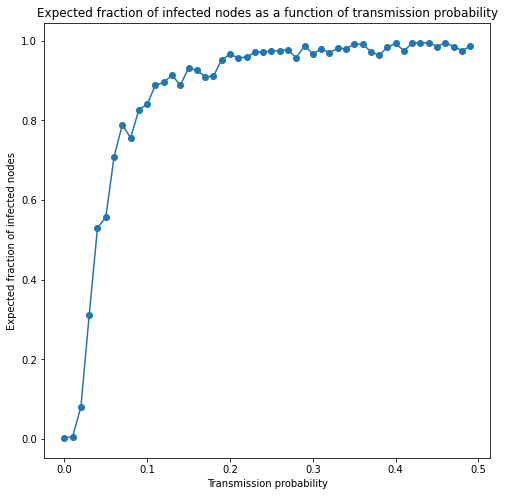

In [ ]:
STARTING_PROB = 0
ENDING_PROB = 0.5
STEP_PROB = 0.01
REPETITIONS = 100
 
beta_values = []
infected_values = []
 
for beta in np.arange(STARTING_PROB, ENDING_PROB, STEP_PROB):
    n_infected = simulate_multiple_independent_cascades(g, beta, REPETITIONS)
    beta_values.append(beta)
    infected_values.append(n_infected/g.number_of_nodes())

plt.figure(figsize=(8,8))
plt.plot(beta_values, infected_values, 'o-')
plt.xlabel("Transmission probability")
plt.ylabel("Expected fraction of infected nodes")
plt.title("Expected fraction of infected nodes as a function of transmission probability")
plt.show()

<font size="+1" color="white">

In this graph we can see an exponential function with its characteristic rapid growth. Where almost all nodes are infected when we have between 20% and 30% probability of transmission. We believe this is due to three reasons. First, our graphic only has one component connected, that is, we have no space that acts as a firewall. Second, we can see many interactions in this graph, and many nodes with a very large degree as can be seen in the k-core decomposition of the two deepest k-core, because it is not the same, that a node that only has one neighbor becomes infected, than a node that has 39 or 38 neighbors. 

And third in this simulation we are in a scenario of asymptomatic transmission because if the transmission were only by people with symptoms, that people would not have come to the meet or when they realized that they were sick they would go home and the infected nodes (in terms of the capability of transmission) would have fewer interactions.

</font>

# 3. Reduce maximum degree

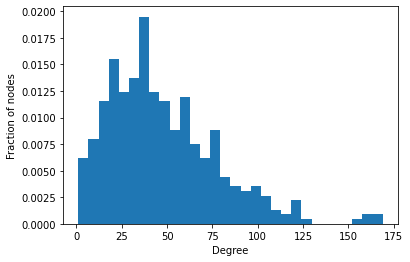

In [ ]:
# Function to plot degree distribution
# adapted from https://stackoverflow.com/a/53970607/1235784
def plot_degree_dist(graph):
    
    # Obtain the sequence of degree of nodes
    degrees = [graph.degree(node) for node in graph.nodes()]
    
    # Draw the histogram of the degree
    plt.hist(degrees, density=True, bins=30)
    plt.xlabel("Degree")
    plt.ylabel("Fraction of nodes")
    plt.show()
    
plot_degree_dist(g)

In [ ]:


def graph_max_degree(graph, max_degree):
  copy = nx.Graph()
  copy.add_nodes_from(graph)
  edges = np.random.permutation(graph.edges())
  
  for edge in edges:
    source = edge[0]
    target = edge[1]
    if copy.degree(source) < max_degree and copy.degree(target) < max_degree:
      copy.add_edge(source, target)

  return copy







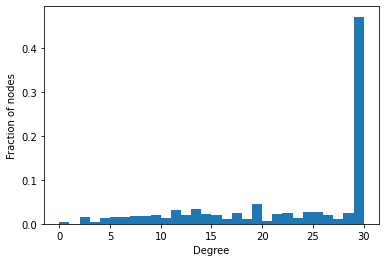

In [ ]:
# Test the output of your function graph_max_degree
gmax = graph_max_degree(g, 30)

# If you notice nodes with degree larger than specified,
# it means your graph_max_degree function is deffective.
plot_degree_dist(gmax)

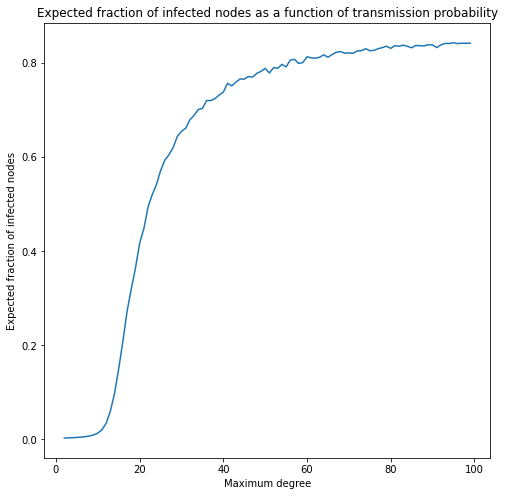

In [ ]:
# Due to high time complexity caused by a large number of loops, this code may take some time to execute.

# Variables used define the ranges of the plot
STARTING_DEGREE = 2
ENDING_DEGREE = 100
STEP_DEGREE = 1

# Variables used to compute and store the degree values and infected values
REPETITIONS = 100
degree_values = []
infected_values = []

# Computing the expected fraction of infected nodes as a function of maximum degree
for degree in np.arange(STARTING_DEGREE, ENDING_DEGREE, STEP_DEGREE):
  n_infected = 0
  gmax = graph_max_degree(g, degree)
  for experiment in range(100):
    n_infected += simulate_multiple_independent_cascades(gmax, 0.1, REPETITIONS)
  n_infected = n_infected /100
  degree_values.append(degree)
  infected_values.append(n_infected / g.number_of_nodes())

# Plotting the output
plt.figure(figsize=(8, 8))
plt.plot(degree_values, infected_values)
plt.xlabel("Maximum degree")
plt.ylabel("Expected fraction of infected nodes")
plt.title("Expected fraction of infected nodes as a function of maximum degree")
plt.show()

In [ ]:
# Print certain range of the values in the plot
cont = 0
for i in range(len(degree_values)):
  if infected_values[i]> 0.4:
    if infected_values[i]> 0.5:
      break
    print("|Max degree "+ str(degree_values[i]) + " :"+ str((infected_values[i] * 100)) +"% Expected of be infected|", end= "\t" )
    cont += 1
    if cont % 2 == 0:
      print("\n")
    

|Max degree 20 :41.731464019851124% Expected of be infected|	|Max degree 21 :44.80990074441685% Expected of be infected|	

|Max degree 22 :49.38151364764269% Expected of be infected|	

<font size="+1" color="white">In this plot we can see that as we are capable of reduce the maximum degree of each node in the graph, i.e reduce the number of interactions we are capable of reduce the increase of the number of infections. For example in order control the spread of the virus and that less than 50 percent will be infected we must be able to reduce the maximum degree to at least 22 as you can see executing the piece of code above.</font>

# 4. Random immunization

In [ ]:



def give_immunity(graph, fraction):
  num_nodes_immune = round(graph.number_of_nodes() * fraction)
  immune = dict([(node, False) for node in graph.nodes()])
  
  immune_keys = sorted(immune.keys())
  
  immune_keys = np.random.permutation(immune_keys)
  
  count=0
  
  for i in immune_keys:
    if count > num_nodes_immune:
      break
    immune[i] = True
    count += 1
  
  return immune



  
def infect_recursive_immune(graph, starting_node, beta, infected, immune):
    # YOUR CODE HERE
    if immune[starting_node] == False:

      infected[starting_node] = True
      neighbors = graph.neighbors(starting_node)
      for neighbor in neighbors:
        if infected[neighbor] == False:
          r = random.uniform(0,1)
          if r < beta:
            infect_recursive_immune(graph, neighbor, beta, infected, immune)
 
def simulate_independent_cascade_immune(graph, starting_node, beta, immune):
    infected = dict([(node, False) for node in graph.nodes()])
    # YOUR CODE HERE
    infect_recursive_immune(graph, starting_node, beta, infected, immune)

    return infected







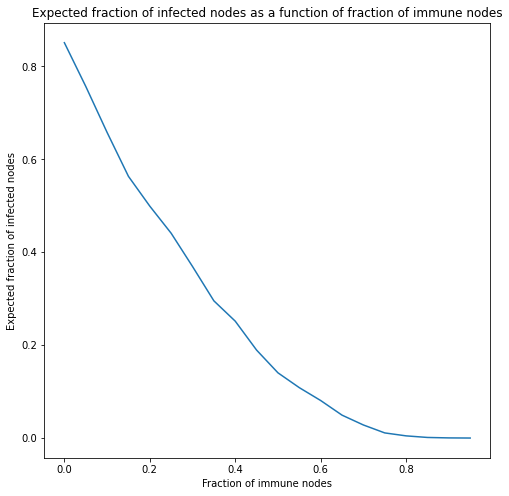

In [ ]:
# Due to high time complexity caused by a large number of loops, this code may take some time to execute.

# Variables used define the ranges of the plot
STARTING_FRACTION_IMMUNE = 0
ENDING_FRACTION_IMMUNE = 1
STEP_FRACTION_IMMUNE = 0.05

# Variables used to compute and store the immune values and infected values
REPETITIONS = 100
fraction_immune_values = []
infected_values = []

# Computing the expected fraction of infected nodes as a function of fraction of nodes with immunization
for fraction_inmune in np.arange(STARTING_FRACTION_IMMUNE, ENDING_FRACTION_IMMUNE, STEP_FRACTION_IMMUNE):
  n_infected = 0
  for experiment in range(1000):
    immune = give_immunity(g, fraction_inmune)
    infected = simulate_independent_cascade_immune(g, random.choice(list(g.nodes())), 0.1, immune)
    n_infected += sum(infected.values())
    
    
  n_infected = n_infected /1000
  fraction_immune_values.append(fraction_inmune)
  infected_values.append(n_infected / g.number_of_nodes())
  

# Plotting the output
plt.figure(figsize=(8, 8))
plt.plot(fraction_immune_values, infected_values)
plt.xlabel("Fraction of immune nodes")
plt.ylabel("Expected fraction of infected nodes")
plt.title("Expected fraction of infected nodes as a function of fraction of immune nodes")
plt.show()

<font size="+1" color="white">In this plot we can see the impact of immunity on the spread of a virus. We see that when we are closer to 80% of the nodes with immunity, the infection rate is very low, this effect is known as group immunity.
</font>

# 5. Conclusions

<font size="+1" color="white">

In this plot we can see the impact of immunity on the spread of a virus. We see that when we are closer to 80% of the nodes with immunity, the infection rate is very low, this effect is known as group immunity.

We think that althought this exeercice was so fun and more important interesting in order to realize the impact of our individual actions in our communities. There are some complexity behind of the measures of which we have spoken here, decrease the maximum degree, decrease the probability of infection and also increase the immunity against the virus.

The complexity in which i'm thinking is in the following ways. First in terms, of the different impact of the virus in people with different age, chronic diseases...
Second, in terms of the economic and social impact of the measures against the spread of the virus. But also, take in consideration environmental effects, like physical effects, as for example it is not the same the velocity of the spread in winter than in summer. And the effects of different social capital in terms of civic culture [1] in the response against the spread of the virus and on the response of the civil society against the measures to fight this spread.





--------------------------------------------------------







[1] Putnam, Robert D., and Robert Leonardi. Making democracy work: Civic traditions in modern Italy. Princeton university press, 1993.

</font>

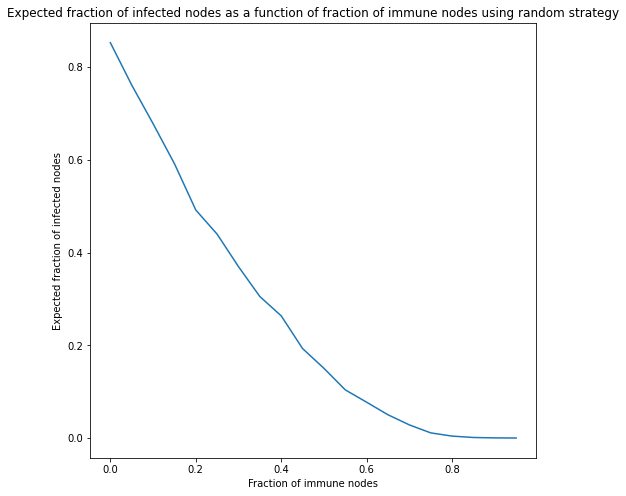

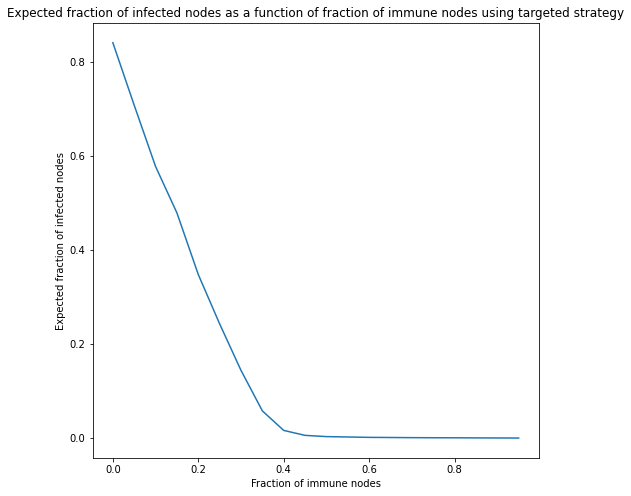

In [ ]:
def targeted_immunity(graph, fraction):
  num_nodes_immune = round(graph.number_of_nodes() * fraction)
  keys = sorted(graph.degree, key=lambda a: a[1], reverse=True)

  immune = dict([(node, False) for node in graph.nodes()])
  count=0
  for i in range(len(keys)):
    if count > num_nodes_immune:
      break
    key = keys[i][0]
    immune[key] = True
    count += 1
  
  return immune

def type_immunity_analysis(type_immunity):
    # Due to high time complexity caused by a large number of loops, this code may take some time to execute.

    # Variables used define the ranges of the plot
    STARTING_FRACTION_IMMUNE = 0
    ENDING_FRACTION_IMMUNE = 1
    STEP_FRACTION_IMMUNE = 0.05

    # Variables used to compute and store the immune values and infected values
    REPETITIONS = 100
    fraction_immune_values = []
    infected_values = []

    # Computing the expected fraction of infected nodes as a function of fraction of nodes with immunization
    for fraction_inmune in np.arange(STARTING_FRACTION_IMMUNE, ENDING_FRACTION_IMMUNE, STEP_FRACTION_IMMUNE):
        n_infected = 0
        for experiment in range(1000):
            if type_immunity == 'random':
                immune = give_immunity(g, fraction_inmune)
            if type_immunity == 'targeted':
                immune = targeted_immunity(g, fraction_inmune)
                
            infected = simulate_independent_cascade_immune(g, random.choice(list(g.nodes())), 0.1, immune)
            n_infected += sum(infected.values())

        n_infected = n_infected / 1000
        fraction_immune_values.append(fraction_inmune)
        infected_values.append(n_infected / g.number_of_nodes())

    # Plotting the output
    plt.figure(figsize=(8, 8))
    plt.plot(fraction_immune_values, infected_values)
    plt.xlabel("Fraction of immune nodes")
    plt.ylabel("Expected fraction of infected nodes")
    plt.title("Expected fraction of infected nodes as a function of fraction of immune nodes using " + type_immunity + " strategy")
    plt.show()

type_immunity_analysis('random')
type_immunity_analysis('targeted')


In this two plots we can see that if the nodes whose have more potential capability to spread the virus are immunized the decrease of the infections is faster than if we use the random strategy.